In [1]:
from teanaps.nlp import SyntaxAnalyzer

sa = SyntaxAnalyzer()

In [ ]:
# TEANAPS 라이브러리를 불러옵니다.
from teanaps.nlp import MorphologicalAnalyzer
from teanaps.nlp import Processing

processing = Processing()
ma = MorphologicalAnalyzer()
#ma.set_tagger("okt")

tokenized_sentence_list = []
#PATH = "data/article_sample.txt"
PATH = "/home/teanaps_home/workspace/local/DRT뉴스기사_중복제거.csv"  #파일경로 추가 필요
POS_LIST = ["NNG", "NNP"]

f = open(PATH, encoding="utf-8")

# 파일에서 기사본문만 추출하여 명사형 문장을 생성합니다.
for line in f:
    #line = line.strip()
    col = line.split(",") # [label, souce, datetime, title, content]
    #label = col[0]         # 기사 검색어
    #title = col[1]        # 언론사
    content = col[2]       # 본문
    tagged_word_list = ma.parse(content)
    sa_result = sa.parse(tagged_word_list, [])
    tokenized_sentence = processing.get_plain_text(sa_result, pos_list=POS_LIST, tag=False)
    tokenized_sentence_list.append(tokenized_sentence)

f.close()

tokenized_sentence_list[:3]

In [13]:
from teanaps.nlp import Processing

pro = Processing()

In [17]:
# 불용어를 추가합니다.
pro.add_stopword(['등', '하는', '똑', '해', '할', '를', '콜', '했다', '위해', '및', '는', '시', '한다', '이', '수', '있다', '위', '개', '지구', '통해', '된', '의', '번', '지난', '따라', '밝혔다', '오는', '대', '있는', '것', '된다', '이번', '말', '내', '대를', '도', '하면', '계', '달', '또한', '똑똑하게', '과', '중', '와', '또', '고', '될'])
result = pro.get_stopword()
print(result)

['해당', '시민', '지역', '경우', '현재', '현황', '제안', '지역', '생각', '부처', '이용', '우리', '문제점', '인천', '군', '것', '및', '시', '수', '모든', '등', '처리', '때문', '문제', '안녕하십니까', '위', '개', '곳', '앞', '후', '또한', '류지', '때', '함', '비', '결과', '다른', '그', '린지', '중인', '하는', '똑', '해', '할', '를', '콜', '했다', '위해', '는', '한다', '이', '있다', '지구', '통해', '된', '의', '번', '지난', '따라', '밝혔다', '오는', '대', '있는', '된다', '이번', '말', '내', '대를', '도', '하면', '계', '달', '똑똑하게', '과', '중', '와', '또', '고', '될']


In [18]:
# 불용어 여부를 확인합니다.
result = pro.is_stopword("또한")
print(result)

True


In [20]:
# 전체 복합명사 리스트를 불러옵니다.
result = pro.get_cnoun()
pro.add_cnoun(['수요응답형', '스마트시티', '스마트도시', '수요응답형버스', '똑버스', '시범운행', '광역시', '광역버스', '시내버스', '신도시', '수요', '수요응답', '기존노선', '골드라인', '김포골드', '김포골드라인', '버스정류장'])

In [22]:
result = pro.get_cnoun()
print(result)

['텍스트마이닝', '텍스트분석', '자연어처리', '지능정보학회', '비정형데이터', '악성댓글', '걸그룹', '쇼케이스', '허위유포', '흔들의자', '공조2', '수요응답형', '스마트시티', '스마트도시', '수요응답형버스', '똑버스', '시범운행', '광역시', '광역버스', '시내버스', '신도시', '수요', '수요응답', '기존노선', '골드라인', '김포골드', '김포골드라인', '버스정류장']


In [23]:
# 전체 동의어 리스트를 불러옵니다.
result = pro.get_synonym()
print(result)

{'맨체스터 유나이티드': ['맨체스터 유나이티드', '맨유'], '아이폰': ['아이폰', 'iphone', '사과폰', '아이폰3s', '아이폰3', '아이폰6', '아이폰x'], '다니엘헤니': ['다니엘헤니', '다니엘', '헤니'], '윤아': ['윤아', '임윤아'], '영화': ['영화', '한국영화'], '국토교통부': ['국토교통부', '국토부'], '대중교통': ['대중교통', '교통']}


In [24]:
pro.add_synonym({'경기도': ['경기도', '경기', '경기지역']})
pro.add_synonym({'광역': ['광역', '광역권']})
pro.add_synonym({'수원': ['수원', '수원시']})
pro.add_synonym({'평택': ['평택', '평택시']})
pro.add_synonym({'농촌': ['농촌', '농어촌']})
pro.add_synonym({'스마트시티': ['스마트시티', '스마트도시']})
pro.add_synonym({'대도시': ['대도시', '대도시권']})

In [25]:
result = pro.get_synonym()
print(result)

{'맨체스터 유나이티드': ['맨체스터 유나이티드', '맨유'], '아이폰': ['아이폰', 'iphone', '사과폰', '아이폰3s', '아이폰3', '아이폰6', '아이폰x'], '다니엘헤니': ['다니엘헤니', '다니엘', '헤니'], '윤아': ['윤아', '임윤아'], '영화': ['영화', '한국영화'], '국토교통부': ['국토교통부', '국토부'], '대중교통': ['대중교통', '교통'], '경기도': ['경기도', '경기', '경기지역'], '광역': ['광역', '광역권'], '수원': ['수원', '수원시'], '평택': ['평택', '평택시'], '농촌': ['농촌', '농어촌'], '스마트시티': ['스마트시티', '스마트도시'], '대도시': ['대도시', '대도시권']}


###  TF-IDF 계산하기

---

In [26]:
from teanaps.text_analysis import TfidfCalculator

tfidf = TfidfCalculator()

In [27]:
# TF/TF-IDF 값을 계산합니다.
tfidf.calculation_tfidf(tokenized_sentence_list, tfidf_count=100, tfidf_state=True)

In [28]:
# 단어 x TF 매트릭스를 생성합니다.
tfidf.get_tf_matrix()

'수요응답형  '옵서버스  @  amp  app  assessment  authority  brt  bus  call  \
0          0      0  0    0    0           0          0    0    0     0   
1          0      0  0    0    0           0          0    0    0     0   
2          0      0  0    0    0           0          0    0    0     0   
3          0      0  0    0    0           0          0    0    0     0   
4          0      0  0    0    0           0          0    0    0     0   
...      ...    ... ..  ...  ...         ...        ...  ...  ...   ...   
1792       0      0  0    0    0           0          0    0    0     0   
1793       0      0  0    0    0           0          0    0    0     0   
1794       0      0  0    0    0           0          0    0    0     0   
1795       0      0  0    0    0           0          0    0    0     0   
1796       0      0  0    0    0           0          0    0    0     0   

      center  ceo  ciel  content  demand  drt  inconvenience  korea.kr  kr  \
0          0    0     0        1       0    0              0         0   0   
1          0    0     0        0       0    0              0         0   0   
2          0    0     0        0       0    0              0         0   0   
3          0    0     0        0       0    0              0         0   0   
4          0    0     0        0       0    0              0         0   0   
...      ...  ...   ...      ...     ...  ...            ...       ...  ..   
1792       0    0     0        0       0    0              0         0   0   
1793       0    0     0        0       0    0              0         0   0   
1794       0    0     0        0       0    0              0         0   0   
1795       0    0     0        0       0    0              0         0   0   
1796       0    0     0        0       0    0              0         0   0   

      maas  maas는  mobility  on-demand  response  role  service  stop  \
0        0      0         0          0         0     0        0     0   
1        0      0         0          0         0     0        0     0   
2        0      0         0          0         0     0        0     0   
3        0      0         0          0         0     0        0     0   
4        0      0         0          0         0     0        0     0   
...    ...    ...       ...        ...       ...   ...      ...   ...   
1792     0      0         0          0         0     0        0     0   
1793     0      0         0          0         0     0        0     0   
1794     0      0         0          0         0     0        0     0   
1795     0      0         0          0         0     0        0     0   
1796     0      0         0          0         0     0        0     0   

      success  transit  transport  transportation  transportation인  year  가까이  \
0           0        0          0               0                0     0    0   
1           0        0          0               0                0     0    0   
2           0        0          0               0                0     0    0   
3           0        0          0               0                0     0    0   
4           0        0          0               0                0     0    0   
...       ...      ...        ...             ...              ...   ...  ...   
1792        0        0          0               0                0     0    0   
1793        0        0          0               0                0     0    0   
1794        0        0          0               0                0     0    0   
1795        0        0          0               0                0     0    0   
1796        0        0          0               0                0     0    0   

      가능  가능성  가동  가락시장역  가람동  가로등  가상  가속  가시  가양역  가용  가운데  가입  가장  가지  가치  \
0      0    0   0      0    0    0   0   0   0    0   0    0   0   0   0   0   
1      0    0   0      0    0    0   0   0   0    0   0    0   0   0   0   0   
2      0    0   0      0    0    0   0   0   0    0   0    0   0   0   0   0  

In [29]:
# 단어 x TF-IDF 매트릭스를 생성합니다.
tfidf.get_tfidf_matrix()

'수요응답형  '옵서버스    @  amp  app  assessment  authority  brt  bus  call  \
0        0.0    0.0  0.0  0.0  0.0         0.0        0.0  0.0  0.0   0.0   
1        0.0    0.0  0.0  0.0  0.0         0.0        0.0  0.0  0.0   0.0   
2        0.0    0.0  0.0  0.0  0.0         0.0        0.0  0.0  0.0   0.0   
3        0.0    0.0  0.0  0.0  0.0         0.0        0.0  0.0  0.0   0.0   
4        0.0    0.0  0.0  0.0  0.0         0.0        0.0  0.0  0.0   0.0   
...      ...    ...  ...  ...  ...         ...        ...  ...  ...   ...   
1792     0.0    0.0  0.0  0.0  0.0         0.0        0.0  0.0  0.0   0.0   
1793     0.0    0.0  0.0  0.0  0.0         0.0        0.0  0.0  0.0   0.0   
1794     0.0    0.0  0.0  0.0  0.0         0.0        0.0  0.0  0.0   0.0   
1795     0.0    0.0  0.0  0.0  0.0         0.0        0.0  0.0  0.0   0.0   
1796     0.0    0.0  0.0  0.0  0.0         0.0        0.0  0.0  0.0   0.0   

      center  ceo  ciel  content  demand  drt  inconvenience  korea.kr   kr  \
0        0.0  0.0   0.0      1.0     0.0  0.0            0.0       0.0  0.0   
1        0.0  0.0   0.0      0.0     0.0  0.0            0.0       0.0  0.0   
2        0.0  0.0   0.0      0.0     0.0  0.0            0.0       0.0  0.0   
3        0.0  0.0   0.0      0.0     0.0  0.0            0.0       0.0  0.0   
4        0.0  0.0   0.0      0.0     0.0  0.0            0.0       0.0  0.0   
...      ...  ...   ...      ...     ...  ...            ...       ...  ...   
1792     0.0  0.0   0.0      0.0     0.0  0.0            0.0       0.0  0.0   
1793     0.0  0.0   0.0      0.0     0.0  0.0            0.0       0.0  0.0   
1794     0.0  0.0   0.0      0.0     0.0  0.0            0.0       0.0  0.0   
1795     0.0  0.0   0.0      0.0     0.0  0.0            0.0       0.0  0.0   
1796     0.0  0.0   0.0      0.0     0.0  0.0            0.0       0.0  0.0   

      maas  maas는  mobility  on-demand  response  role  service  stop  \
0      0.0    0.0       0.0        0.0       0.0   0.0      0.0   0.0   
1      0.0    0.0       0.0        0.0       0.0   0.0      0.0   0.0   
2      0.0    0.0       0.0        0.0       0.0   0.0      0.0   0.0   
3      0.0    0.0       0.0        0.0       0.0   0.0      0.0   0.0   
4      0.0    0.0       0.0        0.0       0.0   0.0      0.0   0.0   
...    ...    ...       ...        ...       ...   ...      ...   ...   
1792   0.0    0.0       0.0        0.0       0.0   0.0      0.0   0.0   
1793   0.0    0.0       0.0        0.0       0.0   0.0      0.0   0.0   
1794   0.0    0.0       0.0        0.0       0.0   0.0      0.0   0.0   
1795   0.0    0.0       0.0        0.0       0.0   0.0      0.0   0.0   
1796   0.0    0.0       0.0        0.0       0.0   0.0      0.0   0.0   

      success  transit  transport  transportation  transportation인  year  가까이  \
0         0.0      0.0        0.0             0.0              0.0   0.0  0.0   
1         0.0      0.0        0.0             0.0              0.0   0.0  0.0   
2         0.0      0.0        0.0             0.0              0.0   0.0  0.0   
3         0.0      0.0        0.0             0.0              0.0   0.0  0.0   
4         0.0      0.0        0.0             0.0              0.0   0.0  0.0   
...       ...      ...        ...             ...              ...   ...  ...   
1792      0.0      0.0        0.0             0.0              0.0   0.0  0.0   
1793      0.0      0.0        0.0             0.0              0.0   0.0  0.0   
1794      0.0      0.0        0.0             0.0              0.0   0.0  0.0   
1795      0.0      0.0        0.0             0.0              0.0   0.0  0.0   
1796      0.0      0.0        0.0             0.0              0.0   0.0  0.0   

       가능  가능성   가동  가락시장역  가람동  가로등   가상   가속   가시  가양역   가용  가운데   가입   가장  \
0     0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0    0.0  0.0  0.0  0.0 

In [30]:
# TF 계산결과를 딕셔너리 형태로 불러옵니다.
tfidf.get_tf_dict()

{'content': 1,
 '버스': 1173,
 '개통': 86,
 '응답': 648,
 '금마': 4,
 '왕궁': 4,
 '노선': 264,
 '조정': 16,
 '전북': 3,
 '익산시': 4,
 '동부': 2,
 '제도': 7,
 '확대': 95,
 '운영': 156,
 '대중교통': 810,
 '편의': 41,
 '적극': 39,
 '탑승': 23,
 '해결': 26,
 '개편': 66,
 '행정': 80,
 '사무': 4,
 '감사': 3,
 '실시': 10,
 '김수영': 6,
 '앞줄': 1,
 '왼쪽': 4,
 '현대차': 31,
 '기아': 2,
 '셔클': 34,
 '사업': 202,
 '실': 14,
 '상무': 6,
 '의성': 1,
 '도심': 17,
 '항공': 5,
 '읍': 26,
 '면': 19,
 '전환': 12,
 '건': 5,
 '전국': 47,
 '청주': 54,
 '시내버스': 80,
 '운행': 453,
 '대수': 3,
 '대로': 12,
 '대가': 6,
 '투입': 107,
 '차': 24,
 '막차': 2,
 '시간': 51,
 '연장': 10,
 '경북': 4,
 '영주': 1,
 '전남': 13,
 '목포시': 1,
 '공공': 9,
 '중이': 10,
 '수송': 15,
 '부문': 5,
 '무공': 1,
 '활성화': 35,
 '승은': 2,
 '평소': 4,
 '체계': 139,
 '오늘': 14,
 '호출': 114,
 '누비': 19,
 '고양시': 17,
 '국민': 5,
 '힘': 4,
 '오준환': 3,
 '경기도': 234,
 '의원': 24,
 '사진': 33,
 '식사동': 10,
 '대곡역': 2,
 '출퇴근': 15,
 '고정': 22,
 '모빌리티': 111,
 '혁신': 27,
 '지원': 30,
 '선정': 46,
 '대구시': 10,
 '팔공산': 2,
 '관광': 30,
 '단지': 29,
 '혁신도시': 22,
 '첨단': 14,
 '의료': 11,
 '산업': 26,

In [31]:
# TF 계산결과를 리스트 형태로 불러옵니다.
tfidf.get_tf_list()

[['버스', 1173],
 ['대중교통', 810],
 ['응답', 648],
 ['운행', 453],
 ['노선', 264],
 ['경기도', 234],
 ['사업', 202],
 ['시범', 193],
 ['서비스', 186],
 ['도입', 162],
 ['택시', 159],
 ['운영', 156],
 ['광역', 140],
 ['체계', 139],
 ['수요', 130],
 ['수단', 125],
 ['이동', 123],
 ['호출', 114],
 ['모빌리티', 111],
 ['투입', 107],
 ['확대', 95],
 ['추진', 91],
 ['김포', 90],
 ['개통', 86],
 ['라인', 85],
 ['도시', 85],
 ['골드', 83],
 ['행정', 80],
 ['시내버스', 80],
 ['승객', 78],
 ['개선', 78],
 ['계획', 75],
 ['플랫폼', 71],
 ['앱', 69],
 ['개편', 66],
 ['전세버스', 66],
 ['스마트', 65],
 ['혼잡', 64],
 ['통합', 63],
 ['주민', 62],
 ['국토교통부', 60],
 ['대책', 58],
 ['시행', 56],
 ['김포시', 56],
 ['신도시', 56],
 ['청주', 54],
 ['개최', 53],
 ['구축', 52],
 ['시간', 51],
 ['공사', 51],
 ['자율', 49],
 ['전국', 47],
 ['제', 47],
 ['예정', 47],
 ['선정', 46],
 ['시작', 46],
 ['대부도', 46],
 ['제공', 45],
 ['완화', 45],
 ['회', 44],
 ['마을', 44],
 ['탄력', 43],
 ['시스템', 43],
 ['신설', 42],
 ['서울', 42],
 ['편의', 41],
 ['차량', 41],
 ['방안', 41],
 ['기존', 40],
 ['부산', 40],
 ['적극', 39],
 ['정책', 39],
 ['광역버스', 39],
 ['역', 39],


In [32]:
# TF 계산결과를 리스트 형태로 불러옵니다.
tfidf.get_tf_list()

[['버스', 1173],
 ['대중교통', 810],
 ['응답', 648],
 ['운행', 453],
 ['노선', 264],
 ['경기도', 234],
 ['사업', 202],
 ['시범', 193],
 ['서비스', 186],
 ['도입', 162],
 ['택시', 159],
 ['운영', 156],
 ['광역', 140],
 ['체계', 139],
 ['수요', 130],
 ['수단', 125],
 ['이동', 123],
 ['호출', 114],
 ['모빌리티', 111],
 ['투입', 107],
 ['확대', 95],
 ['추진', 91],
 ['김포', 90],
 ['개통', 86],
 ['라인', 85],
 ['도시', 85],
 ['골드', 83],
 ['행정', 80],
 ['시내버스', 80],
 ['승객', 78],
 ['개선', 78],
 ['계획', 75],
 ['플랫폼', 71],
 ['앱', 69],
 ['개편', 66],
 ['전세버스', 66],
 ['스마트', 65],
 ['혼잡', 64],
 ['통합', 63],
 ['주민', 62],
 ['국토교통부', 60],
 ['대책', 58],
 ['시행', 56],
 ['김포시', 56],
 ['신도시', 56],
 ['청주', 54],
 ['개최', 53],
 ['구축', 52],
 ['시간', 51],
 ['공사', 51],
 ['자율', 49],
 ['전국', 47],
 ['제', 47],
 ['예정', 47],
 ['선정', 46],
 ['시작', 46],
 ['대부도', 46],
 ['제공', 45],
 ['완화', 45],
 ['회', 44],
 ['마을', 44],
 ['탄력', 43],
 ['시스템', 43],
 ['신설', 42],
 ['서울', 42],
 ['편의', 41],
 ['차량', 41],
 ['방안', 41],
 ['기존', 40],
 ['부산', 40],
 ['적극', 39],
 ['정책', 39],
 ['광역버스', 39],
 ['역', 39],


In [33]:
# TF-IDF 계산결과를 딕셔너리 형태로 불러옵니다.
tfidf.get_tfidf_dict()

{'버스': 122.9348934601121,
 '대중교통': 94.02007365420336,
 '응답': 74.24546291131223,
 '운행': 68.81907814635728,
 '노선': 41.86171563465263,
 '경기도': 40.35855822813798,
 '사업': 33.53183698205339,
 '시범': 35.01974858477772,
 '서비스': 34.513669850738694,
 '도입': 29.632065551681546,
 '택시': 31.590713820550828,
 '운영': 27.541105662511956,
 '광역': 28.469612324535827,
 '체계': 32.82015798225572,
 '수요': 23.110410305056714,
 '수단': 23.09557717967272,
 '이동': 25.808755765818372,
 '호출': 19.65465683039245,
 '모빌리티': 28.22093582243123,
 '투입': 19.80108664406376,
 '확대': 21.743857786008615,
 '추진': 17.955207245042953,
 '김포': 16.044757613332326,
 '개통': 19.604935440127814,
 '라인': 15.33586590372692,
 '도시': 21.077945607718867,
 '골드': 14.994726926727203,
 '행정': 19.179653473701567,
 '시내버스': 18.979603026469132,
 '승객': 13.445600660442272,
 '개선': 17.946495154182937,
 '계획': 13.400845544599843,
 '플랫폼': 16.563931715800095,
 '앱': 11.228288575437626,
 '개편': 19.48315947155583,
 '전세버스': 15.368301410913421,
 '스마트': 14.822790471965709,
 '혼잡'

In [34]:
# TF-IDF 계산결과를 리스트 형태로 불러옵니다.
tfidf.get_tfidf_list()[:20]

[['버스', 122.9348934601121],
 ['대중교통', 94.02007365420336],
 ['응답', 74.24546291131223],
 ['운행', 68.81907814635728],
 ['노선', 41.86171563465263],
 ['경기도', 40.35855822813798],
 ['시범', 35.01974858477772],
 ['서비스', 34.513669850738694],
 ['사업', 33.53183698205339],
 ['체계', 32.82015798225572],
 ['택시', 31.590713820550828],
 ['도입', 29.632065551681546],
 ['광역', 28.469612324535827],
 ['모빌리티', 28.22093582243123],
 ['운영', 27.541105662511956],
 ['이동', 25.808755765818372],
 ['수요', 23.110410305056714],
 ['수단', 23.09557717967272],
 ['확대', 21.743857786008615],
 ['도시', 21.077945607718867]]

In [35]:
# 전체 문서의 단어주머니를 불러옵니다.
tfidf.get_word_list()[:20]

['content',
 '버스',
 '개통',
 '응답',
 '금마',
 '왕궁',
 '노선',
 '조정',
 '전북',
 '익산시',
 '동부',
 '제도',
 '확대',
 '운영',
 '대중교통',
 '편의',
 '적극',
 '탑승',
 '해결',
 '개편']

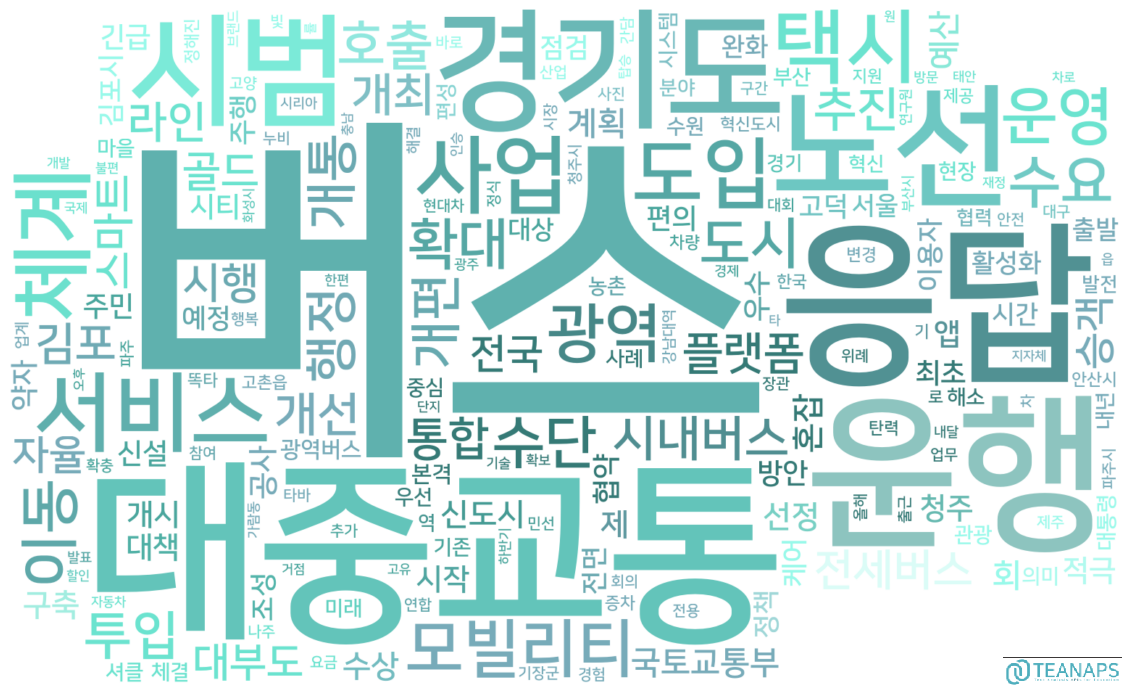

In [39]:
# TF-IDF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)

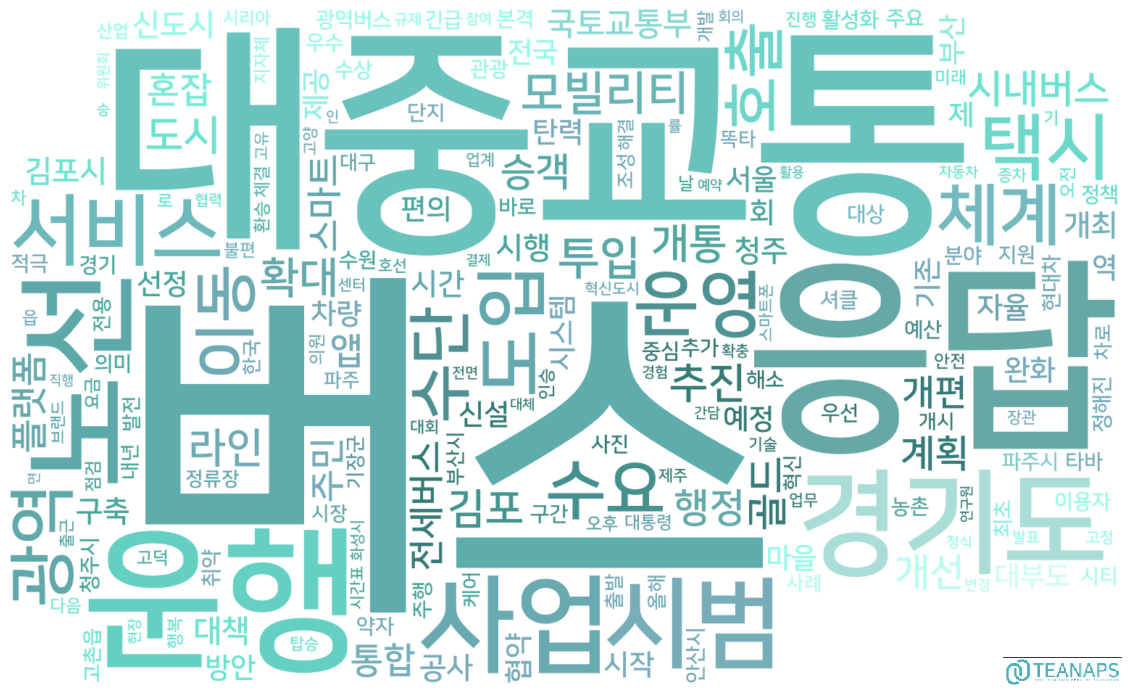

In [41]:
# TF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tf_dict()
tfidf.get_wordcloud(count_dict)

## 토픽모델링

In [42]:
from teanaps.text_analysis import TopicClustering

tc = TopicClustering()

In [43]:
NUM_TOPICS = 3     # 주제의 개수
NUM_KEYWORDS = 15  # 주제별 키워드 개수

lda_result = tc.topic_modeling("lda", tokenized_sentence_list, NUM_TOPICS, NUM_KEYWORDS)
lda_result

[(0,
  [('버스', 0.0792344),
   ('응답', 0.038378913),
   ('운행', 0.035547324),
   ('대중교통', 0.024579018),
   ('노선', 0.017274024),
   ('시범', 0.013970236),
   ('경기도', 0.013376864),
   ('호출', 0.011063902),
   ('투입', 0.010875584),
   ('수요', 0.010590511),
   ('김포', 0.009515333),
   ('라인', 0.009050823),
   ('골드', 0.008842141),
   ('운영', 0.008369594),
   ('서비스', 0.008130594)]),
 (1,
  [('버스', 0.06443118),
   ('대중교통', 0.025923392),
   ('응답', 0.019136287),
   ('경기도', 0.018742193),
   ('운행', 0.01826881),
   ('사업', 0.0127619505),
   ('행정', 0.009140746),
   ('체계', 0.009018279),
   ('모빌리티', 0.007499006),
   ('택시', 0.007095885),
   ('시범', 0.0070831114),
   ('확대', 0.0067213504),
   ('스마트', 0.006656772),
   ('신도시', 0.0064494456),
   ('우수', 0.006006765)]),
 (2,
  [('대중교통', 0.05414376),
   ('응답', 0.022949664),
   ('서비스', 0.013278493),
   ('택시', 0.013187233),
   ('사업', 0.012672451),
   ('버스', 0.011411228),
   ('노선', 0.010921717),
   ('광역', 0.009462062),
   ('도입', 0.0094345715),
   ('모빌리티', 0.008679996),
   ('

In [44]:
lda_model = tc.get_model()
tc.display_model_result(lda_model)

In [45]:
perplexity, coherence = tc.get_model_validation_result()
perplexity, coherence    # perplexity: 혼잡도, coherence: 일관성

(-6.611175299434003, 0.36524140680312467)